# Merging, Grouping and Sythnesizing Data in Pandas
# CS 109A/AC 209A/STAT 121A Data Science: Lab 5 (Solutions)
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## How to synthesize data from multiple sources

This simple data scraping exercise is designed to show you how to combine data frames.  Often in data science you will be bringing together data from different places to answer new and interesting questions.

Your goal here is to make a scatter plot of cheese consumption versus cardiovascular disease rates for countries of the world, however you must first combine these data.  Let's start by loading them.

Load `cheese.csv` and `cardio_disease.csv`. Examine your data.

In [62]:
#This is per capita cheese consumption for areas of the world, added across the years 1990 to 2012.
#The units are kilograms per capita.
cheese = pd.DataFrame(pd.read_csv('cheese.csv'))
cheese.head()

,AreaName,Cheese
0,Afghanistan,23.34
1,Africa,23.34
2,Albania,93.51
3,Algeria,11.88
4,Americas,145.67


In [63]:
#Read in cardiovascular disease data
#For the year 2012
cardio_disease = pd.DataFrame(pd.read_csv('cardio_disease.csv'))
cardio_disease.head()

,Country,Age-standardized mortality rate by cause (per 100 000 population)
0,Bahamas,220.0
1,Bahrain,187.2
2,Bangladesh,166.2
3,Barbados,128.1
4,Belarus,464.2


## Joining dataframes and plotting

Pandas has functionality to combine the two data frames and sort them by a key.  Read the documentation here for information on how to do this:  http://pandas.pydata.org/pandas-docs/stable/merging.html

1. Merge the infromation in the two data frames by country, using the `merge` function. Why won't concatenating the dataframes work?
```
pd.merge(df1, df2, ...)
```

2. Make a scatter plot of cheese consumption versus cardiovascular disease

3. What do you notice in the relationship between these variables?

In [64]:
result = pd.merge(cheese, cardio_disease, left_on='AreaName', right_on='Country', how='left')
result.head()

,AreaName,Cheese,Country,Age-standardized mortality rate by cause (per 100 000 population)
0,Afghanistan,23.34,NaN,NaN
1,Africa,23.34,NaN,NaN
2,Albania,93.51,NaN,NaN
3,Algeria,11.88,NaN,NaN
4,Americas,145.67,NaN,NaN


In [65]:
result = result.dropna()
result.head()

,AreaName,Cheese,Country,Age-standardized mortality rate by cause (per 100 000 population)
14,Bahamas,121.53,Bahamas,220.0
15,Bangladesh,0.23,Bangladesh,166.2
16,Barbados,151.62,Barbados,128.1
17,Belarus,77.09,Belarus,464.2
18,Belgium,238.59,Belgium,111.1


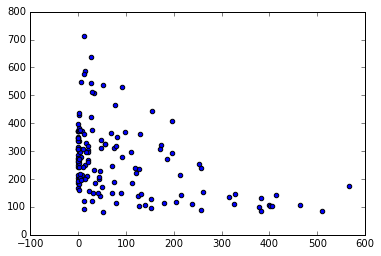

In [66]:
plt.scatter(result['Cheese'].values, result['Age-standardized mortality rate by cause (per 100 000 population)'].values)
plt.show()

## Data scraping issues

What countries included in the merged data frame?  How do they compare to the countries in the original frames?

What difficulties do you anticipate when merging dataframes like this?  For example, from disparate sources, the same country may be spelled differently.  How would you identify and deal with such issues?

## Grouping Data in Pandas Data Frames

Say we want to split the data frame into two subsets: those countries whose cheese consumption is above the world mean and those countries whose cheese consumption is below the world mean.

We could do this by filtering the data frame and record the two subsets each as a data frame, but later we might have to recombine the data! Instead we can create groups within one data frame using `pandas`' `groupby` functionality.

1. First define two bins of values for the cheese colum to separate the values into those below the mean and those above the mean. Store the end points of your bins in a list:
```
[0, cheese_mean, cheese_max]
```

2. Use `pandas`' `cut` functionality to sort each cheese value into one of the bins:
```
pd.cut(cheese_values, bins=[0, cheese_mean, cheese_max])
```

3. Group the data in your data frame into two groups, those whose cheese assumption falls into the first bin, and those that fall into the second:
```
df.groupby(the cut you just made in step 2)
```

4. Play around with the object returned by `groupby`, try accessing each of the groups, using `get_group`.

5. Now, we want to compute the stats for the mortality column by group. Try applying the `mean` function to the mortality column in the `groupby` object you got from step 4. What does the result look like?

6. If you want to apply a list of functions to the mortality column, you can use the `aggregate` function:
```
df['column'].agg([function_1, funciton_2, ...])
```

7. Use `aggregate` to compute the mean and the std of the mortality column in your grouped dataframe. What does the result look like? Try to access each value in the resuliting structure.

In [18]:
pd.cut(result['Cheese'], bins=[0, result['Cheese'].mean(), result['Cheese'].max() + 1])

0           (0, 87.784]
1      (87.784, 567.74]
2           (0, 87.784]
3           (0, 87.784]
4      (87.784, 567.74]
5           (0, 87.784]
6      (87.784, 567.74]
7      (87.784, 567.74]
8      (87.784, 567.74]
9      (87.784, 567.74]
10          (0, 87.784]
11     (87.784, 567.74]
12          (0, 87.784]
13     (87.784, 567.74]
14          (0, 87.784]
15          (0, 87.784]
16          (0, 87.784]
17          (0, 87.784]
18          (0, 87.784]
19          (0, 87.784]
20          (0, 87.784]
21     (87.784, 567.74]
22          (0, 87.784]
23          (0, 87.784]
24          (0, 87.784]
25          (0, 87.784]
26     (87.784, 567.74]
27          (0, 87.784]
28          (0, 87.784]
29          (0, 87.784]
             ...       
124    (87.784, 567.74]
125    (87.784, 567.74]
126         (0, 87.784]
127         (0, 87.784]
128    (87.784, 567.74]
129         (0, 87.784]
130         (0, 87.784]
131         (0, 87.784]
132    (87.784, 567.74]
133    (87.784, 567.74]
134         (0, 

In [39]:
results_by_cheese = result.groupby(pd.cut(result['Cheese'], bins=[0, result['Cheese'].mean(), result['Cheese'].max() + 1]))
results_by_cheese['Cheese'].get_group('(0, 87.784]')

0      23.34
2      11.88
3       3.76
5      55.78
10      0.23
12     77.09
14     73.92
15      0.60
16     20.60
17     75.88
18     55.38
19      8.02
20     17.74
22      0.25
23     13.49
24      0.08
25      0.43
27      0.25
28      0.09
29     78.61
30      4.26
31     30.49
32      1.51
33     45.96
35     34.54
40      6.21
41     14.61
42     70.37
44     49.68
46      1.41
       ...  
110     3.10
111    11.75
112     4.02
115    12.99
116    33.47
117    68.98
119     0.01
120    48.59
121     2.23
122    12.48
123     0.87
126     0.97
127    20.29
129     1.02
130    22.74
131    16.32
134    29.61
135     1.77
136     0.24
137     0.46
139    10.36
140    47.05
141    11.29
143    51.92
145     3.13
148    12.32
150     0.45
151    28.90
152     2.43
153     5.71
Name: Cheese, dtype: float64

In [41]:
results_by_cheese_stats = results_by_cheese[['Age-standardized mortality rate by cause (per 100 000 population)']].agg([np.mean, np.std])
results_by_cheese_stats.head()

Age-standardized mortality rate by cause (per 100 000 population)  \
                                                                              mean   
Cheese                                                                               
(0, 87.784]                                              303.802913                  
(87.784, 567.74]                                         202.277551                  

                              
                         std  
Cheese                        
(0, 87.784]       121.563016  
(87.784, 567.74]  115.198217

In [50]:
results_by_cheese_stats['Age-standardized mortality rate by cause (per 100 000 population)']

,mean,std
Cheese,,
"(0, 87.784]",303.802913,121.563016
"(87.784, 567.74]",202.277551,115.198217


In [51]:
results_by_cheese_stats['Age-standardized mortality rate by cause (per 100 000 population)']['mean']

Cheese
(0, 87.784]         303.802913
(87.784, 567.74]    202.277551
Name: mean, dtype: float64